# Исследование данных о компьютерных играх
Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

Цель исследования — выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Для этого нам необходимо узнать сколько игр выпускалось в разные годы; определить, как менялись продажи по платформам; выяснить, какие платформы лидируют по продажам, растут или падают; как влияют на продажи отзывы пользователей и критиков; определить, какие жанры игр самые прибыльные; так же определить для пользователя каждого региона (NA, EU, JP) самые популярные платформы и самые популярные жанры; выяснить, влияет ли рейтинг ESRB на продажи в отдельном регионе. Далее, проверить две гипотезы: 1)средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2)средние пользовательские рейтинги жанров Action и Sports разные.

Данные о играх мы получим из файла games.csv. О качестве данных ничего не известно. Поэтому перед исследованием понадобится обзор данных.

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в пять этапов:

1. Обзор данных.
    
2. Предобработка данных.
    
3. Исследовательский анализ данных.
    
4. Формирование портрета пользователя каждого региона.
    
5. Проверка гипотез.

### Откроем файл с данными и изучим общую информацию.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [51]:
data=pd.read_csv('/datasets/games.csv')
display(data.head(10)) #выведем первые 10 строк
print(data.info()) #получим общую информацию о датафрейме

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


### Предобработка данных.

Приведем названия столбцов к нижнему регистру.

In [52]:
data.columns = data.columns.str.lower()
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Преобразуем данные в нужные типы.

In [53]:
data['name'] = data['name'].astype('str')
data['platform'] = data['platform'].astype('str')
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['genre'] = data['genre'].astype('str')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB
None


Мы привели данные в столбцах с названием игры, платформы и жанром игры к строковому типу, так как, очевидно, они содержат текстовую информацию (рейтинг от организации ESRB так же необходимо привести к строковому типу, но мы сделаем это следующим шагом, после заполнения пропусков). Данные в столбце с годом выпуска мы привели к целочисленному типу, потому что год не может быть вещественным числом. 

Обработаем пропуски и сделаем проверку на дубликаты:

In [55]:
print(data.isna().sum()) # посчитаем количество пропусков в столбцах
print('Количество явных дубликатов:',data.duplicated().sum()) # подсчёт явных дубликатов

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
Количество явных дубликатов: 0


In [56]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


Дубликатов в данных не оказалось, а вот пропуски есть. Можем заметить, что в столбце year_of_release доля пропусков составляет менее 2% от общего числа строк - их можно удалить. 
А вот в стобцах critic_score, user_score и rating оказалось довольно много пропусков, их необходимо обработать каким-либо образом. Заполним пропуски, где это возможно.

In [57]:
data.dropna(subset = ['year_of_release'], inplace = True)
    
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
data['user_score'] = data['user_score'].astype('float')

data['rating'] = data['rating'].replace('K-A', 'E10+')
data.loc[:,'rating'].fillna('Не определен', inplace=True)
data['rating'] = data['rating'].astype('str')

print(data.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating                0
dtype: int64


Пропуски в годе выпуска мы удалим, так как их немного и это не повлияет на дальнейшее исследование. Пропуски в данном столбце могли возникнуть по таким причинам: точный год выпуска игры не определен или их просто забыли указать при заполнении.

В столбцах critic_score, user_score и rating оказалось довольно много пропусков. Причинами появления пропусков могут быть отсутствие оценок по данным играм (возможно, игры еще только вышли и не получили оценок).

Обратим внимание на аббревиатуру tbd в столбце с оценкой пользователей. Аббревиатура tbd означает, что данные еще не определены. То есть, данные были специально не заполнены, потому что с рейтингом просто напросто еще не определились. Поэтому заменим заменим tbd на NaN, а потом приведем к типу float, так как значения столбца являются вещественными переменными.

В столбце rating есть значения 'K-A' и 'E10+' - они носят один и тот же смысл (K-A было переименовано на E10+), поэтому значения 'K-A' заменим на 'E10+'. Далее, заменим пропуски в столбце rating с nan на 'Неопределенный', так как неизвестно какими точными значениями можно заполнить данные пропуски.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [58]:
data['sum_sales']=data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

На этапе предобработки данных в нашей задаче мы получили общую информацию о датафрейме; привели названия столбцов к нижнему регистру; поменяли типы данных, где это было необходимо; проверили данные на дубликаты; определили в каких столбцах есть пропуски и заполнили их различными способами; а так же посчитали суммарные продажи во всех регионах.

### Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

Text(0, 0.5, 'Количество выпущенных игр')

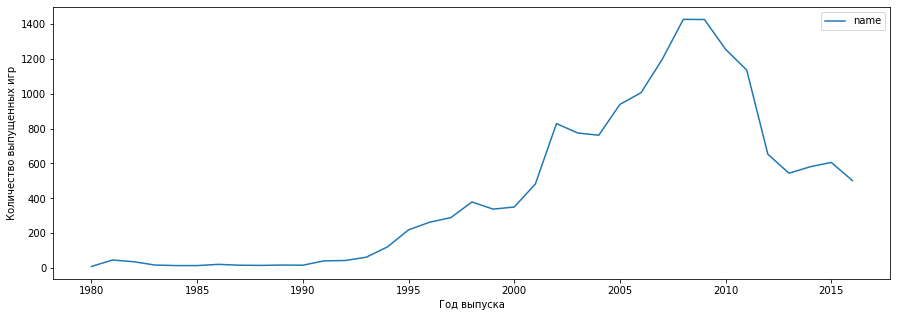

In [59]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index().plot(x='year_of_release',y='name',figsize=(15,5))
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")

Из графика видно, что рост выпуска компьютерных игр начался только с 1990х годов и продолжался примерно до 2008 года, после 2008 года вплоть до 2016 года наблюдается резкий спад количества выпущенных игр. Я думаю, что рассматривать данные за весь период не имеет смысла, поэтому будем работать с последними 3 годами, то есть с играми выпущенными после 2013 года.

Посмотрим, как менялись продажи по платформам.

Text(0, 0.5, 'Количество продаж')

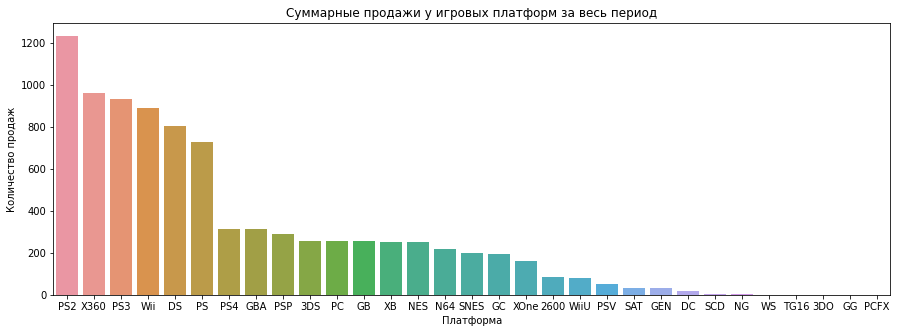

In [60]:
platform_sales = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x=platform_sales.index,y=platform_sales['sum_sales'])
plt.title('Суммарные продажи у игровых платформ за весь период')
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")

По диаграмме видно, что платформами с самыми наибольшими суммарными продажами за весь период являются PS2, X360, PS3, Wii, DS И PS.

Определим так же суммарные продажи платформ после 2013 года (актуальный период).

Text(0, 0.5, 'Количество продаж')

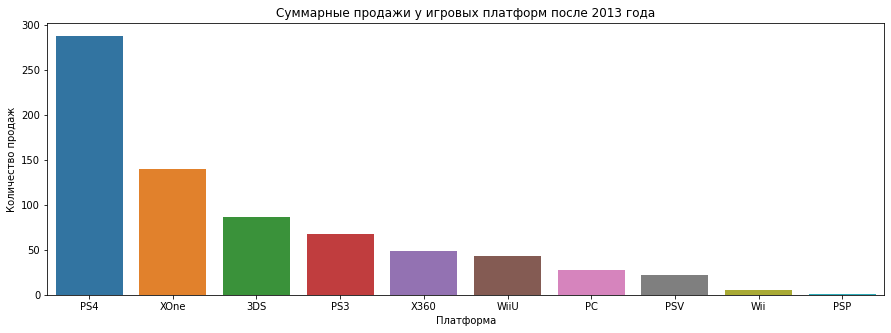

In [61]:
new_data = data.query('2013 < year_of_release') # получим срез данных после 2013 года
new_platform_sales = new_data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x=new_platform_sales.index,y=new_platform_sales['sum_sales'])
plt.title('Суммарные продажи у игровых платформ после 2013 года')
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")

По диаграмме видно, что платформами с самыми наибольшими суммарными продажами после 2013 года являются PS4 и XOne. 

Построим распределение по годам у самых популярных платформ (чтобы определить характерный срок существования платформы, возьмем данные за последние 10 лет):

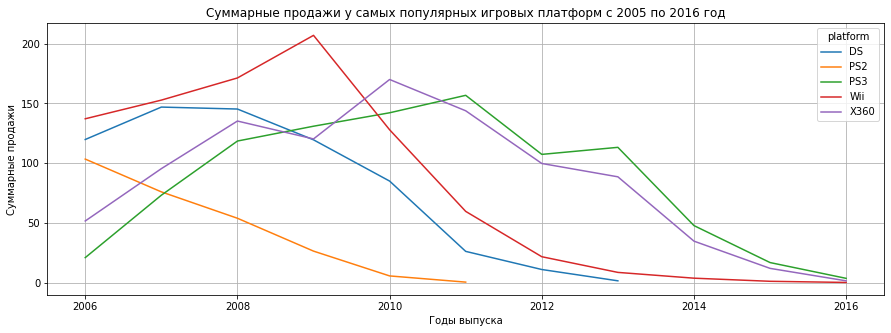

In [62]:
neww_data = data.query('(2005 < year_of_release) and (platform=="PS2" or platform=="X360" or platform=="PS3" or platform=="Wii" or platform=="DS")')
neww_data.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(15, 5))
plt.title('Суммарные продажи у самых популярных игровых платформ с 2005 по 2016 год')
plt.xlabel('Годы выпуска')
plt.ylabel('Суммарные продажи')
plt.show()

Характерный срок существования платформы - это примерно 10 лет. Из графика так же можно увидеть, что платформы PS3, X360 и Wii продавались до 2016 года, DS до 2013, а PS2 до 2011. У платформы Wii наблюдается резкий скачок по продажам к 2009 году, а после резкий спад. А самыми продаваевыми являются платформы PS3 и X360. 

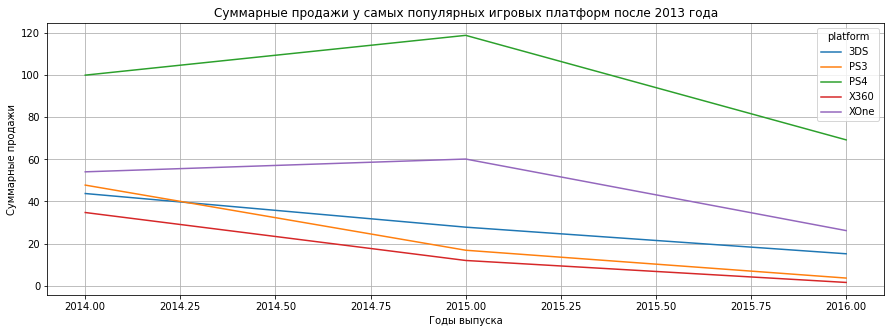

In [63]:
new5_data = new_data.query('platform=="PS4" or platform=="XOne" or platform=="3DS" or platform=="PS3" or platform=="X360"')
new5_data.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(15, 5))
plt.title('Суммарные продажи у самых популярных игровых платформ после 2013 года')
plt.xlabel('Годы выпуска')
plt.ylabel('Суммарные продажи')
plt.show()

Потенциально прибыльными платформами за актуальный период являются PS4 и XOne. Платформы 3DS PS3 и X360 являются менее прибыльными, ведь за весь актуальный период их продажи падают.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [64]:
new_data.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


Text(0, 0.5, 'Глобальные продажи')

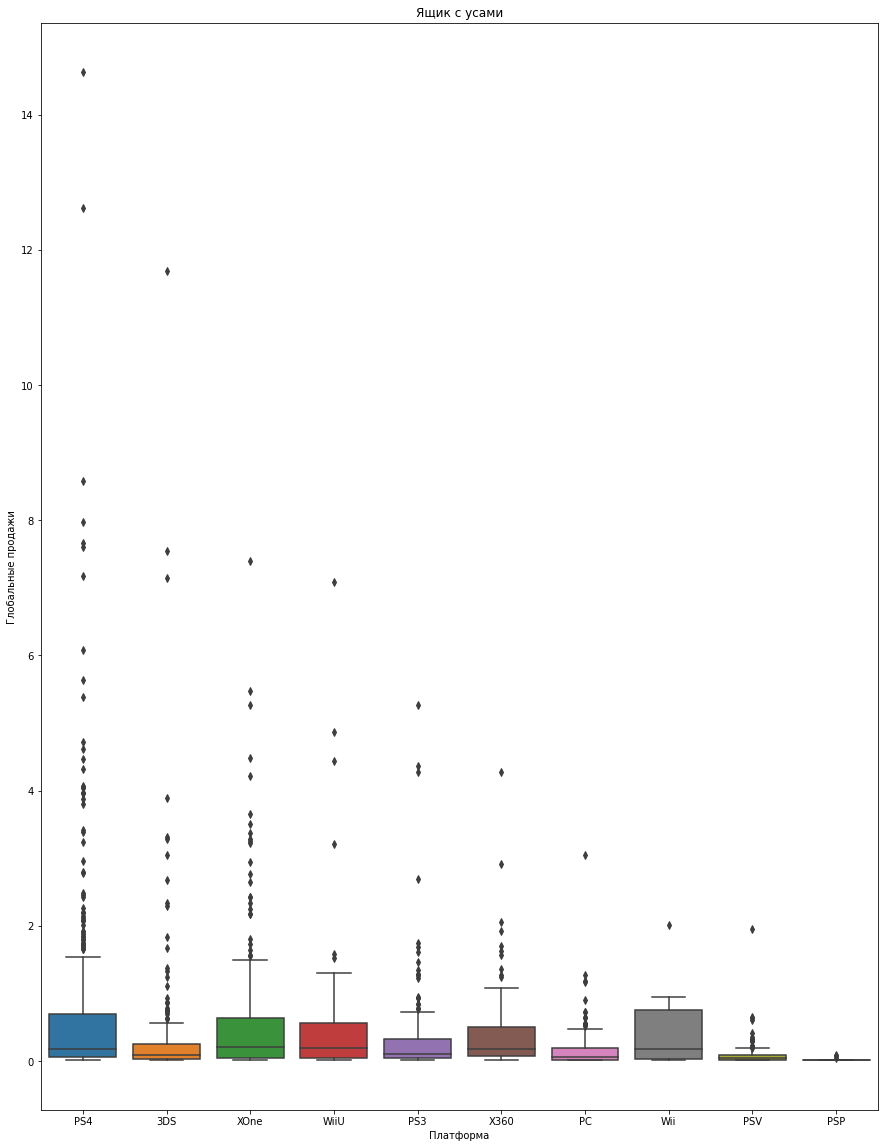

In [65]:
plt.figure(figsize=(15,20))
sns.boxplot(data=new_data, x='platform', y='sum_sales')
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')

В данной диаграмме можно увидеть, что есть очень редкие выбросы (например, с продажами до 15 млн у PS4 и до 12 млн у 3DS). Уберем выбросы и сделаем более массштабированную диаграмму, чтобы лучше увидеть квартили и медианы. Для этого будем использовать параметр ylim().

Text(0, 0.5, 'Глобальные продажи')

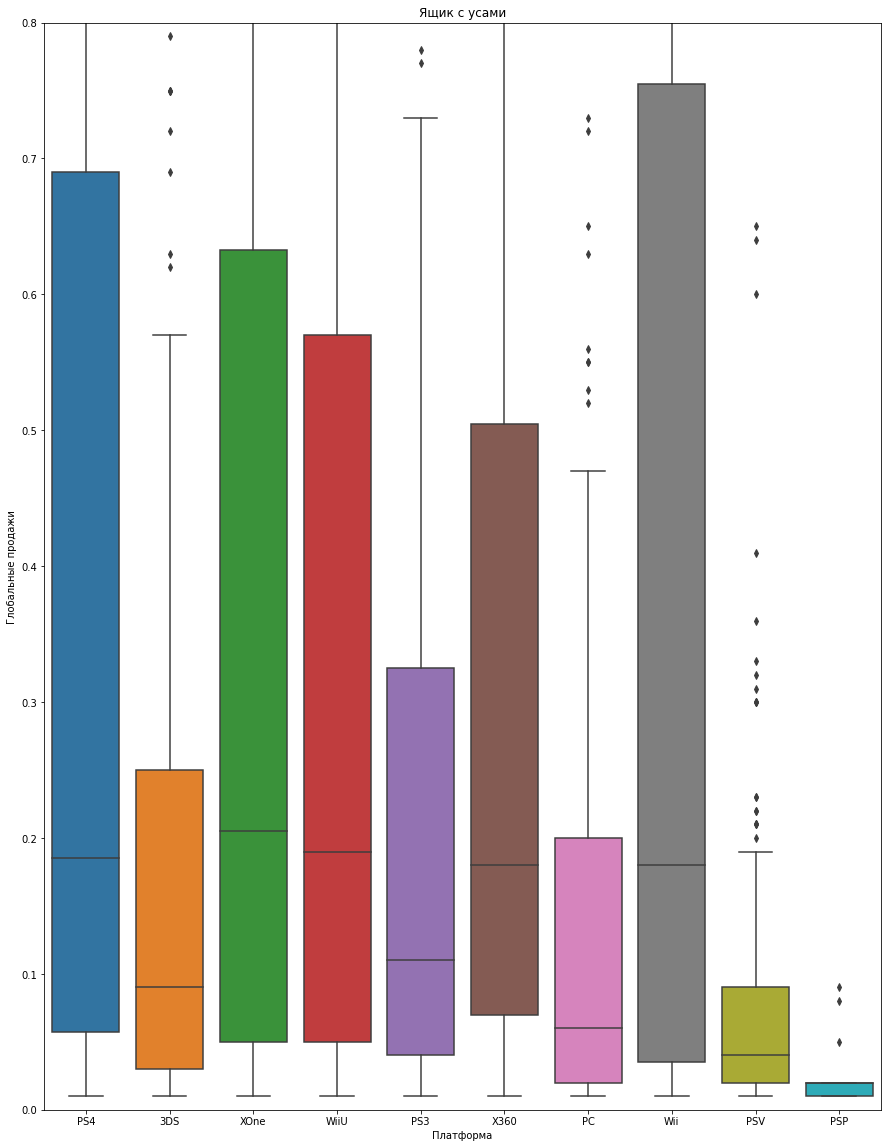

In [66]:
plt.figure(figsize=(15,20))
sns.boxplot(data=new_data, x='platform', y='sum_sales')
plt.ylim(0, 0.8)
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')

В данной диаграмме можем увидеть, что медиана у всех платформ протекает по разному. Можно выделить несколько платформ с самым большим числом продаж: XOne, WiiU и PS4. Так же можно заметить, что у WiiU очень большой диапазон значений по продажам, а у PSP наоборот, очень маленький.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Для диагностики возьмем платформу PS4.

Корреляция междуотзывами пользователей и продажами платформы PS4: -0.04


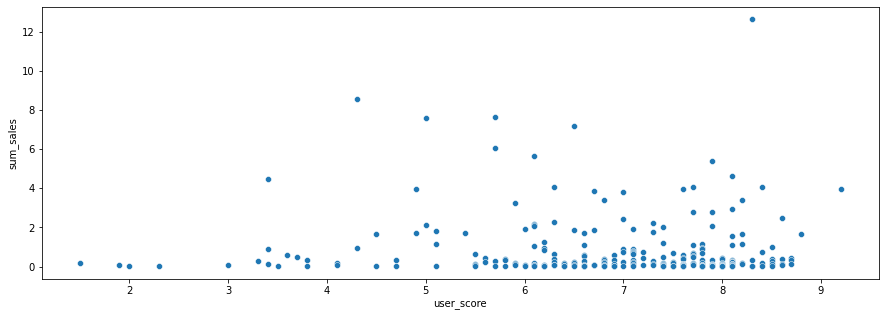

In [67]:
ps_4 = new_data[new_data['platform']=='PS4']
plt.figure(figsize=(15,5))
sns.scatterplot(data=ps_4, x='user_score', y='sum_sales')
print('Корреляция междуотзывами пользователей и продажами платформы PS4:',ps_4['user_score'].corr(ps_4['sum_sales']).round(2))

Игры с минимальными оценками пользователей вообще не имеют разброса в количестве продаж. Далее, с более высокими отзывами разброс появляется, но не очень сильный, хотя и есть некоторые выбросы. Можем сделать вывод, что связь между отзывами пользователей и продажами практически отсутствует (так как коэффициент Пирсона очень близок к нулю), то есть отзывы пользователей практически не влияют на продажи.

Корреляция между отзывами критиков и продажами платформы PS4: 0.4


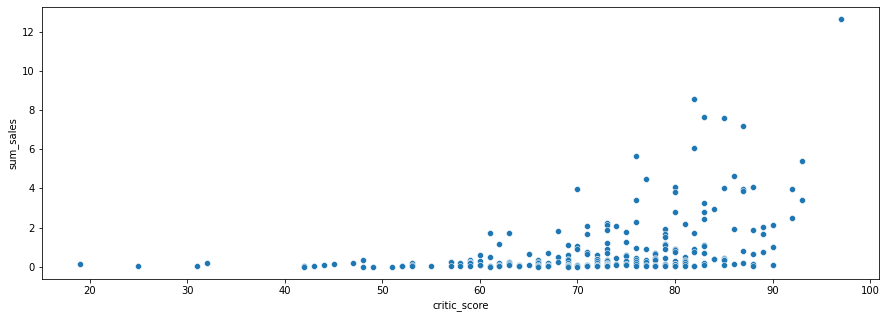

In [68]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=ps_4, x='critic_score', y='sum_sales')
print('Корреляция между отзывами критиков и продажами платформы PS4:',ps_4['critic_score'].corr(ps_4['sum_sales']).round(2))

Игры с минимальными оценками критиков так же не имеют разброса в количестве продаж. Постепенно, с более высокими отзывами разброс появляется, а у игр с высокими отзывами разброс максимальный. Корреляция равна 0.4, что уже гораздо больше, чем у отзывов пользователей. Можем сделать вывод, что связь между отзывами критиков и продажами уже сильнее, чем между отзывами пользователей и продажам, но все же она не очень сильная, отзывы критиков не особо влияют на продажи.

In [69]:
x_one = new_data[new_data['platform']=='XOne']
print('Корреляция между отзывами пользователей и продажами платформы XOne:',x_one['user_score'].corr(x_one['sum_sales']).round(2))
print('Корреляция между отзывами критиков и продажами платформы XOne:',x_one['critic_score'].corr(x_one['sum_sales']).round(2))

ds_3 = new_data[new_data['platform']=='3DS']
print('Корреляция между отзывами пользователей и продажами платформы 3DS:',ds_3['user_score'].corr(ds_3['sum_sales']).round(2))
print('Корреляция между отзывами критиков и продажами платформы 3DS:',ds_3['critic_score'].corr(ds_3['sum_sales']).round(2))

ps_3 = new_data[new_data['platform']=='PS3']
print('Корреляция между отзывами пользователей и продажами платформы PS3:',ps_3['user_score'].corr(ps_3['sum_sales']).round(2))
print('Корреляция между отзывами критиков и продажами платформы PS3:',ps_3['critic_score'].corr(ps_3['sum_sales']).round(2))

x_360 = new_data[new_data['platform']=='X360']
print('Корреляция между отзывами пользователей и продажами платформы X360:',x_360['user_score'].corr(x_360['sum_sales']).round(2))
print('Корреляция между отзывами критиков и продажами платформы X360:',x_360['critic_score'].corr(x_360['sum_sales']).round(2))

Корреляция между отзывами пользователей и продажами платформы XOne: -0.07
Корреляция между отзывами критиков и продажами платформы XOne: 0.43
Корреляция между отзывами пользователей и продажами платформы 3DS: 0.22
Корреляция между отзывами критиков и продажами платформы 3DS: 0.31
Корреляция между отзывами пользователей и продажами платформы PS3: -0.17
Корреляция между отзывами критиков и продажами платформы PS3: 0.45
Корреляция между отзывами пользователей и продажами платформы X360: -0.14
Корреляция между отзывами критиков и продажами платформы X360: 0.53


У других платформ так же нет особой связи между отывами и продажами. Но можно заметить, что связь между отзывами критиков и продажами больше, чем отзывами пользователей, но все равно является достаточно слабой.

Посмотрим на общее распределение игр по жанрам. 

Text(0, 0.5, 'Продажи')

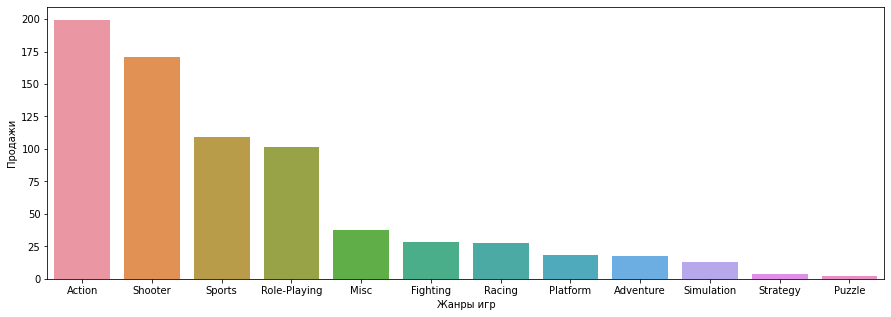

In [70]:
genre_sales = new_data.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
genre_sales = genre_sales.reset_index().rename_axis(None, axis=1)
plt.figure(figsize=(15,5))
sns.barplot(data=genre_sales, x='genre', y='sum_sales')
plt.xlabel('Жанры игр')
plt.ylabel('Продажи')

Судя по данной диаграмме, жанры с самыми высокими продажами - экшен, на втором месте расположились игры с жанром шутер, на третьем - спортивные игры, на четвертом - ролевые игры. Самые низкие продажи у игр с жанром стратегия и пазл. Но не факт, что максимальные продажи являются самыми прибыльными. Так как в данных продажи по жанру для разных платформ, и одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы провалились. Но для прибыльности нам нужны стабильные жанры, который приносит доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос. Поэтому, далее построим диаграмму размаха для сравнения медианных продаж.

Text(0, 0.5, 'Продажи')

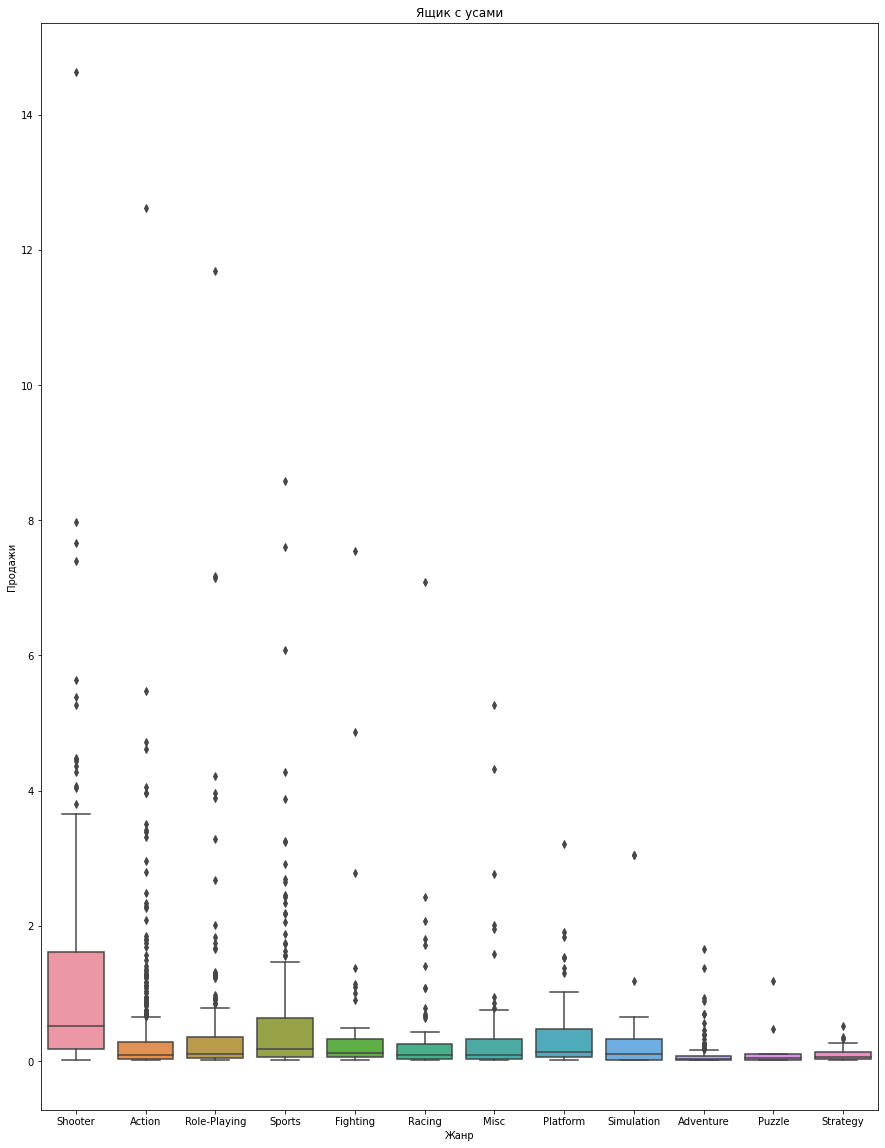

In [71]:
plt.figure(figsize=(15,20))
sns.boxplot(data=new_data, x='genre', y='sum_sales')
plt.title('Ящик с усами')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

В данной диаграмме можно увидеть, что есть очень редкие выбросы (например, с продажами до 15 млн у игр с жанром shooter и до 13 млн у игр с жанром action). Уберем выбросы и сделаем более массштабированную диаграмму, чтобы лучше увидеть квартили и медианы. Для этого будем использовать параметр ylim().

Text(0, 0.5, 'Продажи')

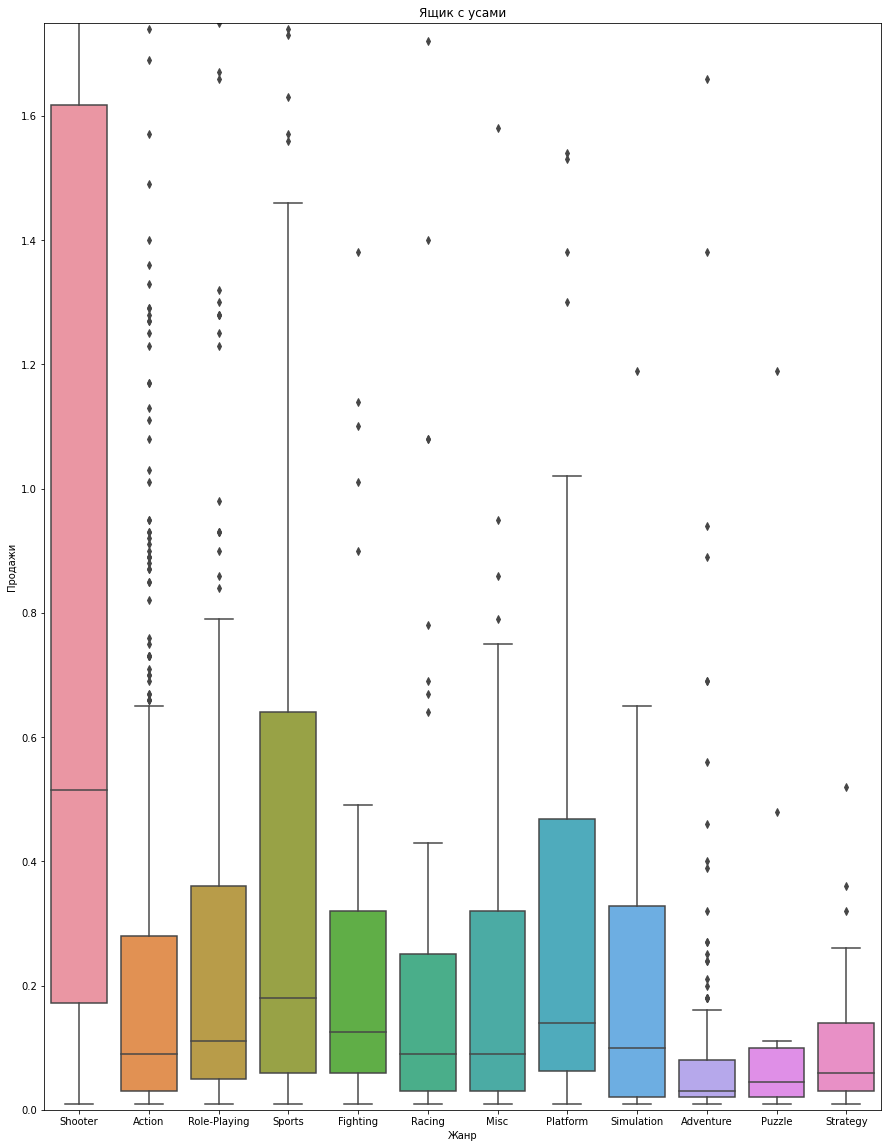

In [72]:
plt.figure(figsize=(15,20))
sns.boxplot(data=new_data, x='genre', y='sum_sales')
plt.ylim(0, 1.75)
plt.title('Ящик с усами')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

В данной диаграмме можем увидеть, что медиана у всех жанров протекает по разному. И на этой диаграмме уже другие жанры, являются более прибыльными, shooter является самым продаваемым жанром, на втором месте расположились игры с жанром sport. Напомним, что в диаграмме с рапределеним продаж по жанрам, жанрами с самым большим число продаж были action и shooter; здесь же картинка совсем другая, и жанр action, сильно устпуает по продажам другим жанрам, это как раз произошло из-за того, что одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились. Так что теперь можем сделать вывод, что стабильные прибыльные жанры, который приносит доход не зависимо от платформы - это shooter, sports и platform. Самые низкие продажи у игр с жанром adventure и puzzle.

На этапе исследовательского анализа данных мы выяснили, что рост выпуска компьютерных игр начался только с 1990х годов и продолжался примерно до 2008 года, после 2008 года вплоть до 2016 года наблюдается резкий спад количества выпущенных игр.
Платформами с самыми наибольшими суммарными продажами за весь период являются PS2, X360, PS3, Wii, DS И PS. А после 2013 года (то есть за актуальный период) платформами с самыми наибольшими суммарными продажами являются PS4 и XOne (потенциально прибыльные). Характерный срок существования платформы - это примерно 10 лет. Так же определили, что у платформ нет особой связи между отывами критиков и пользователей с продажами. А стабильно прибыльными жанрами являются shooter, sports и platform. Самые низкие продажи у игр с жанром adventure и puzzle.

### Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5).

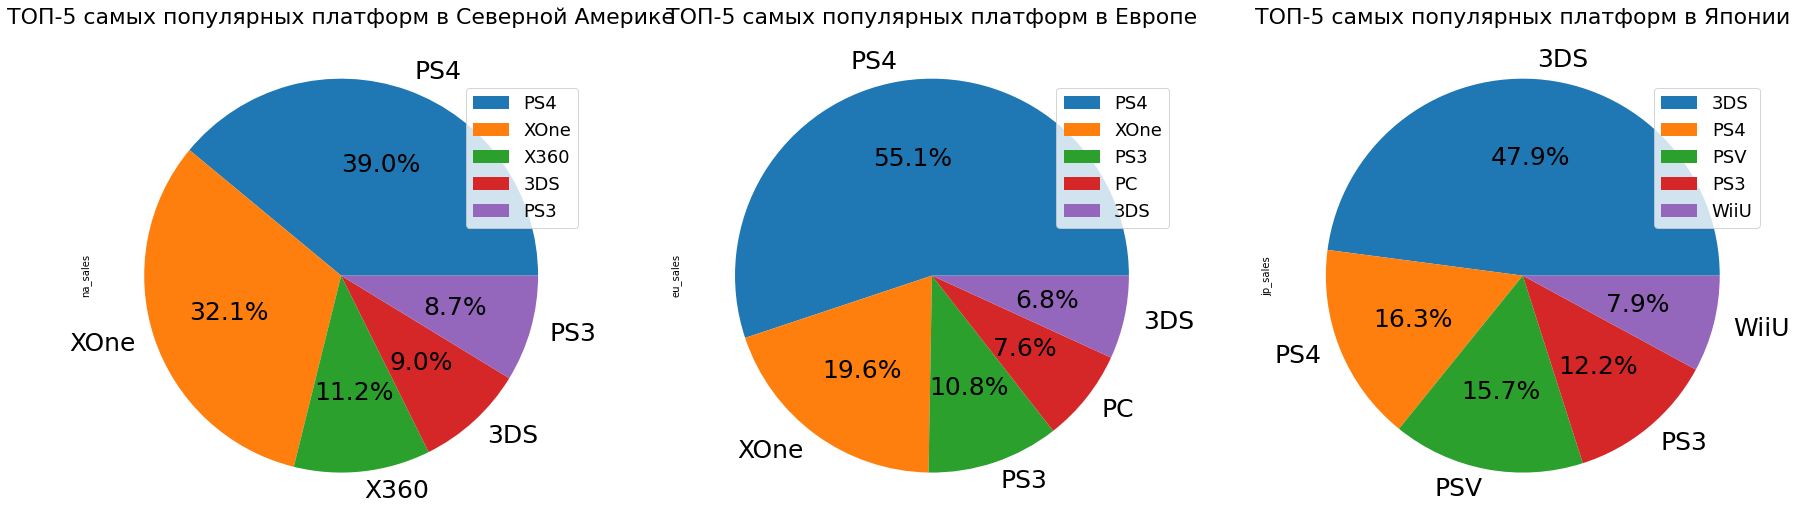

In [73]:
plt.figure(figsize=[30,30])

platform_na = new_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
plt.subplot(2, 3, 1)
platform_na.plot(y = 'na_sales', kind = 'pie',fontsize=25, autopct='%1.1f%%')
plt.title('ТОП-5 самых популярных платформ в Северной Америке', fontsize=22)
plt.legend(bbox_to_anchor=(0.6,0.3,0.4,0.6), fontsize=18)

platform_eu = new_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
plt.subplot(2, 3, 2)
platform_eu.plot(y = 'eu_sales', kind = 'pie',fontsize=25, autopct='%1.1f%%')
plt.title('ТОП-5 самых популярных платформ в Европе', fontsize=22)
plt.legend(bbox_to_anchor=(0.6,0.3,0.4,0.6), fontsize=18)

platform_jp = new_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
plt.subplot(2, 3, 3)
platform_jp.plot(y = 'jp_sales', kind = 'pie',fontsize=25, autopct='%1.1f%%')
plt.title('ТОП-5 самых популярных платформ в Японии', fontsize=22)
plt.legend(bbox_to_anchor=(0.6,0.3,0.4,0.6), fontsize=18)

plt.show()

Самыми популярными платформами в Северной Америке являются (по убыванию продаж): PS4, XOne, X360, 3DS, PS3. Платформы PS4 и XOne являются в данном регионе самыми продаваемыми; X360, 3DS и PS3 уже не так популярны.

Самыми популярными платформами в Европе являются (по убыванию продаж): PS4, Xone, PS3, PC, 3DS. Платформа PS4 занимает больше половины доли продаж, немало продаж так же у платформы XOne. 

Самыми популярными платформами в Японии являются (по убыванию продаж): 3DS, PS4, PSV, PS3, WiiU. Платформа 3DS занимает почти половину доли продаж. Вторую половину делят другие 4 платформы в данном топе.

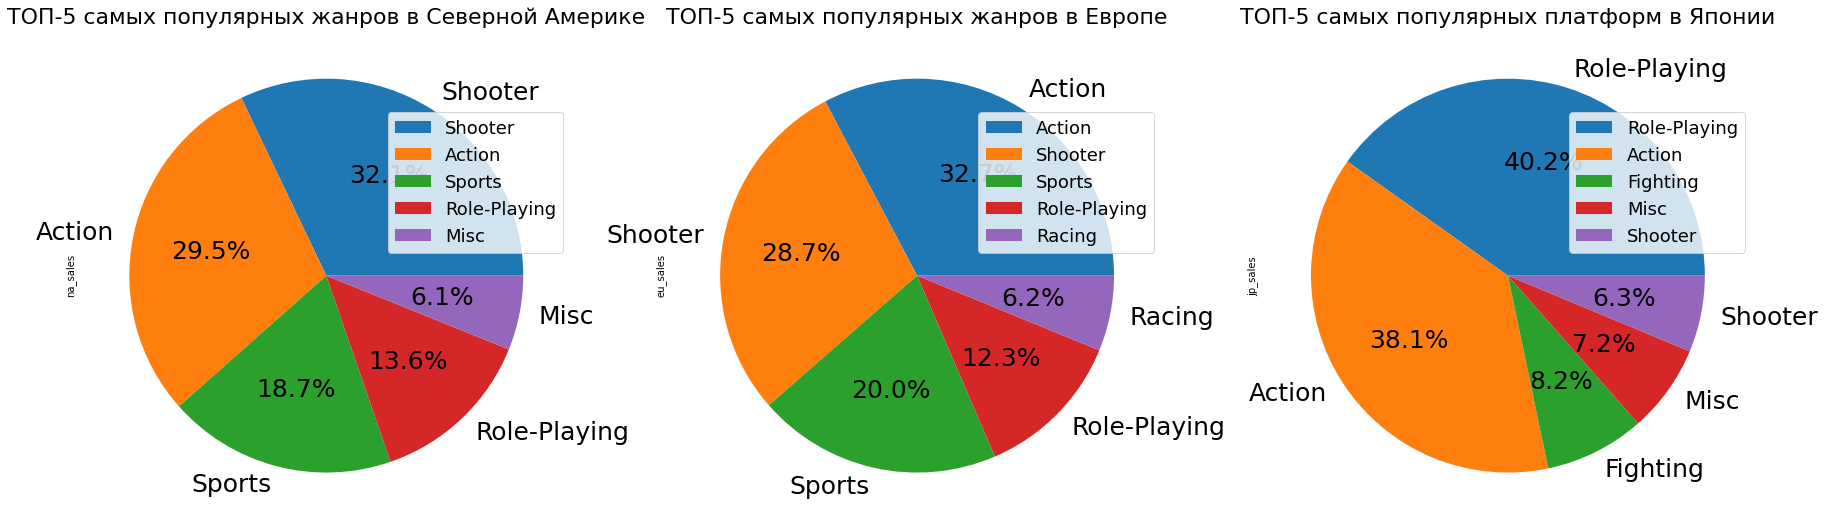

In [74]:
plt.figure(figsize=[30,30])

genre_na = new_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
plt.subplot(2, 3, 1)
genre_na.plot(y = 'na_sales', kind = 'pie',fontsize=25, autopct='%1.1f%%')
plt.title('ТОП-5 самых популярных жанров в Северной Америке', fontsize=22)
plt.legend(bbox_to_anchor=(0.6,0.25,0.4,0.6), fontsize=18)

genre_eu = new_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
plt.subplot(2, 3, 2)
genre_eu.plot(y = 'eu_sales', kind = 'pie',fontsize=25, autopct='%1.1f%%')
plt.title('ТОП-5 самых популярных жанров в Европе', fontsize=22)
plt.legend(bbox_to_anchor=(0.6,0.25,0.4,0.6), fontsize=18)

genre_jp = new_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
plt.subplot(2, 3, 3)
genre_jp.plot(y = 'jp_sales', kind = 'pie',fontsize=25, autopct='%1.1f%%')
plt.title('ТОП-5 самых популярных платформ в Японии', fontsize=22)
plt.legend(bbox_to_anchor=(0.6,0.25,0.4,0.6), fontsize=18)

plt.show()

Самыми популярными жанрами в Северной Америке являются (по убыванию продаж): shooter, action, sports, role-playing, misc.

Самыми популярными жанрами в Европе являются (по убыванию продаж): action, shooter, sports, role-playing, racing.

Самыми популярными жанрами в Японии являются (по убыванию продаж): role-playing, action, fighting, misc, shooter.

Если смотреть в совокупности по всем регионам, все-таки самыми популярными являются жанры shooter и action, чуть менее популярными role-playing и sports. И еще меньше в различных регионах играют в жанрах misc, racing и fighting.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

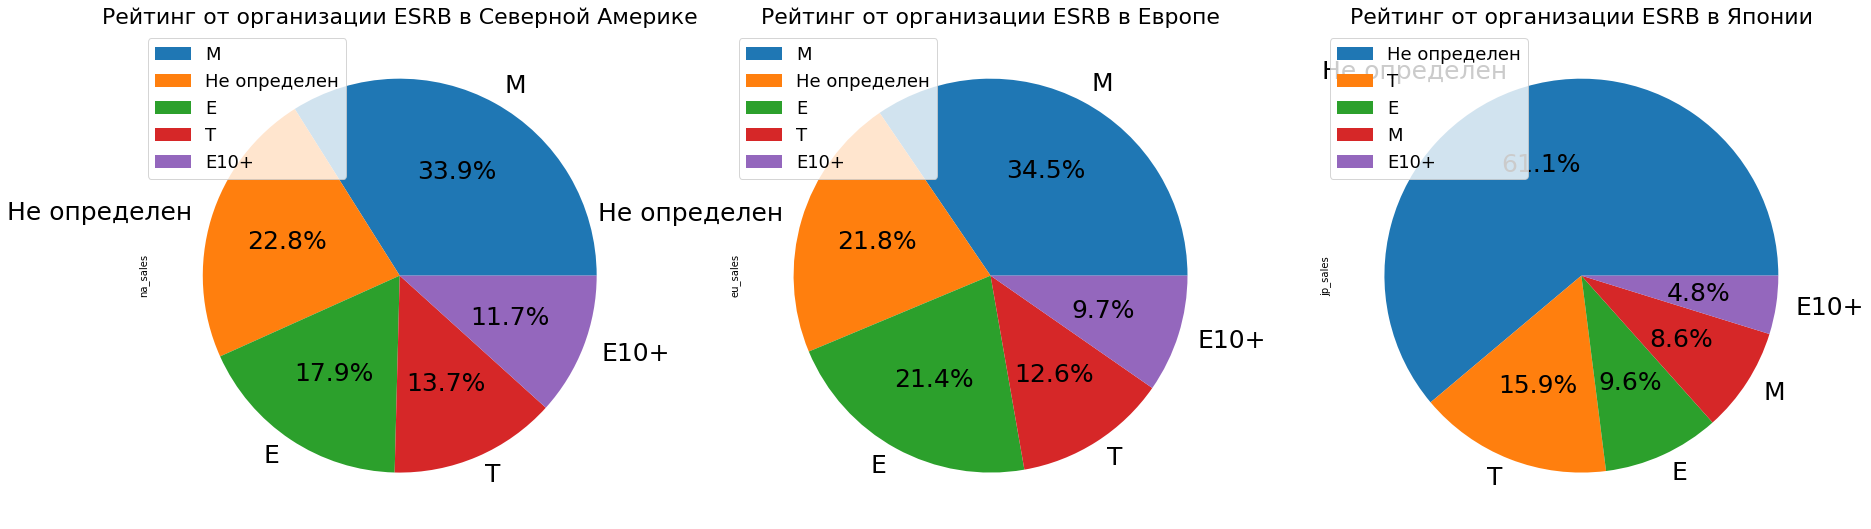

In [75]:
plt.figure(figsize=[30,30])

rating_na = new_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
plt.subplot(2, 3, 1)
rating_na.plot(y = 'na_sales', kind = 'pie',fontsize=25, autopct='%1.1f%%')
plt.title('Рейтинг от организации ESRB в Северной Америке', fontsize=22)
plt.legend(bbox_to_anchor=(0.01,0.4,0.4,0.6), fontsize=18)

rating_eu = new_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
plt.subplot(2, 3, 2)
rating_eu.plot(y = 'eu_sales', kind = 'pie',fontsize=25, autopct='%1.1f%%')
plt.title('Рейтинг от организации ESRB в Европе', fontsize=22)
plt.legend(bbox_to_anchor=(0.01,0.4,0.4,0.6), fontsize=18)

rating_jp = new_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
plt.subplot(2, 3, 3)
rating_jp.plot(y = 'jp_sales', kind = 'pie',fontsize=25, autopct='%1.1f%%')
plt.title('Рейтинг от организации ESRB в Японии', fontsize=22)
plt.legend(bbox_to_anchor=(0.01,0.4,0.4,0.6), fontsize=18)

plt.show()

В Северной Америке больше всего продаж у игр с рейтингом "для взрослых", на втором месте игры с неопределенным рейтингом и на третьем месте игры с рейтингом "для всех".

    
В Европе больше всего продаж у игр с рейтингом "для взрослых", далее идут игры с неопределенным рейтингом и на третьем месте игры с рейтингом "для всех".

В Японии большинство продаж у игр с неопределенным рейтингом, на втором месте игры с рейтингом "подросткам" и на третьем месте игры с рейтингом "для всех". ESRB - американский рейтинг, поэтому большое количество игр с неопределенным рейтингом в Японии можно объяснить тем, что в Японии игры просто другого производства и у них своя рейтинг-система.

На данном этапе мы составили портрет пользователя каждого региона, и выяснили, что ТОП-5 платформ в Северной Америке: PS4, XOne, X360, 3DS, PS3; в Европе: PS4, Xone, PS3, PC, 3DS; в Японии: 3DS, PS4, PSV, PS3, WiiU. 

Так же оказалось, что ТОП-5 жанров в Северной Америке: shooter, action, sports, role-playing, misc; в Европе: action, shooter, sports, role-playing, racing; в Японии: role-playing, action, fighting, misc, shooter. 

Выяснилось так же, что самые продаваемые игры в Северной Америке и Европе с рейтингом "для взрослых", с неопределенным рейтингом и рейтингом "для всех". А в Японии преобладают игры с неопределенным рейтингом (так как в Японии своя рейтинг-система), так же продаваемыми являются игры с рейтингом "подросткам" и рейтингом "для всех". 

### Проверка гипотез

Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H_0: Средние пользовательские рейтинги (user_score) платформ Xbox One = средние пользовательские рейтинги (user_score) платформ PC

H_a: Средние пользовательские рейтинги (user_score) платформ Xbox One ≠ средние пользовательские рейтинги (user_score) платформ PC

In [21]:
xone_hyp = new_data[(new_data['platform']=='XOne')]['user_score']
pc_hyp = new_data[(new_data['platform']=='PC')]['user_score']

print('Среднее платформы XOne: ',xone_hyp.mean())
print('Среднее платформы PC: ',pc_hyp.mean())

results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False) #вызов метода для проверки гипотезы
alpha = .05 #зададим значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран 
if (results.pvalue < alpha): # условный оператор с выводом строки с ответом
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Среднее платформы XOne:  6.594545454545454
Среднее платформы PC:  6.316260162601626
p-значение: 0.139237120435483
Не получилось отвергнуть нулевую гипотезу


Kритический уровень статистической значимости alpha мы взяли равным 0.05 (он является оптимальным). 
Значение p-value равно почти 14%. Таким образом, нам не получилось отвергнуть нулевую гипотезу. То есть, с вероятностью в 14% можно получить одинаковые средние пользовательские рейтинги платформ Xbox One и PC.

Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные.

H_0: Средние пользовательские рейтинги (user_score) жанров Action = средние пользовательские рейтинги (user_score) жанров Sports

H_a: Средние пользовательские рейтинги (user_score) жанров Action ≠ средние пользовательские рейтинги (user_score) жанров Sports

In [22]:
genre_action_hyp = new_data[(new_data['genre']=='Action')]['user_score']
genre_sports_hyp = new_data[(new_data['genre']=='Sports')]['user_score']

print('Среднее экшн-игры: ',genre_action_hyp.mean())
print('Среднее спортивной игры: ',genre_sports_hyp.mean())

results = st.ttest_ind(genre_action_hyp. dropna(), genre_sports_hyp.dropna(), equal_var=False) #вызов метода для проверки гипотезы
alpha = .05 #зададим значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран 
if (results.pvalue < alpha): # условный оператор с выводом строки с ответом
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Среднее экшн-игры:  6.766442953020134
Среднее спортивной игры:  5.225196850393701
p-значение: 9.658176026869598e-15
Отвергаем нулевую гипотезу


Kритический уровень статистической значимости alpha мы взяли равным 0.05. 
Получив p-value, мы отвергли нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинаковые средние пользовательские рейнтинги по жанрам Action и Sports.

### Общий вывод

В данном проекте мы выполнили предобработку данных, то есть заполнили пропуски в данных, где это было возможно; преобразовали типы данных. 

Так же мы провели исследовательский анализ данных, из которого можно сделать выводы: рост выпуска компьютерных игр начался только с 1990х годов и продолжался примерно до 2008 года, после 2008 года вплоть до 2016 года наблюдался резкий спад количества выпущенных игр. Платформами с самыми наибольшими суммарными продажами за весь период являются PS2, X360, PS3, Wii, DS И PS. А после 2013 года (то есть за актуальный период) платформами с самыми наибольшими суммарными продажами являются PS4 и XOne (потенциально прибыльные). Так же определили, что у платформ нет особой связи между отывами критиков и пользователей с продажами. А стабильно прибыльными жанрами являются shooter, sports и platform. Самые низкие продажи у игр с жанром adventure и puzzle.

Так же нам удалось составить портрет пользователя каждого региона (NA, EU, JP), вследствие чего были сделаны следующие выводы;
ТОП-5 платформ в Северной Америке: PS4, XOne, X360, 3DS, PS3; в Европе: PS4, Xone, PS3, PC, 3DS; в Японии: 3DS, PS4, PSV, PS3, WiiU.

ТОП-5 жанров в Северной Америке: shooter, action, sports, role-playing, misc; в Европе: action, shooter, sports, role-playing, racing; в Японии: role-playing, action, fighting, misc, shooter.

Cамые продаваемые игры в Северной Америке и Европе с рейтингом "для взрослых", с неопределенным рейтингом и рейтингом "для всех". А в Японии преобладают игры с неопределенным рейтингом (так как в Японии своя рейтинг-система), так же продаваемыми являются игры с рейтингом "подросткам" и рейтингом "для всех". 

На последнем этапы мы проверили 2 гипотезы и выяснили, что с вероятностью в 14% можно получить одинаковые средние пользовательские рейтинги платформ Xbox One и PC; а так же то, что практически нет вероятности получить одинаковые средние пользовательские рейнтинги по жанрам Action и Sports.